In [110]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
entry_log=pd.read_csv("logs.csv")

In [4]:
entry_log

,Id,Date and Time,Event message,Event number,Object #1,Description #1,Object #2,Description #2,Object #3,Description #3,Object #4,Description #4,Card number
0,1,2019.01.02. 9:21:49,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895
1,2,2019.01.02. 9:22:54,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Czender András,0,NaN,0,NaN,00215:09895
2,3,2019.01.02. 9:29:15,Access granted,203,12,A66 - 12 Recepció (2-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046
3,4,2019.01.02. 9:31:19,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Puskás Nóra,0,NaN,0,NaN,00059:58046
4,5,2019.01.02. 9:36:51,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041
5,6,2019.01.02. 9:38:00,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Ripka Péter,0,NaN,0,NaN,00110:57041
6,7,2019.01.02. 9:44:46,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673
7,8,2019.01.02. 9:46:16,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Szívós István,0,NaN,0,NaN,00008:58673
8,9,2019.01.02. 10:02:19,Access granted,203,12,A66 - 04 FÕBEJÁRAT (F-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162
9,10,2019.01.02. 10:03:26,Access granted,203,12,A66 - 17 Recepció (3-1) Door #1,5,Megyaszai Dániel,0,NaN,0,NaN,00055:39162


In [5]:
entry_log["Date"]=""
entry_log["Time"]=""

In [6]:
for date_time,ind in zip(entry_log["Date and Time"],entry_log.index.values):
    entry_log.loc[ind,"Date"]=date_time.split()[0]
    entry_log.loc[ind,"Time"]=date_time.split()[1]

In [7]:
work_date_after_holiday=sorted(pd.value_counts(entry_log["Date"]).index)[9:]
work_date_after_holiday.remove("2019.01.26.")
work_date_after_holiday

['2019.01.14.',
 '2019.01.15.',
 '2019.01.16.',
 '2019.01.17.',
 '2019.01.18.',
 '2019.01.19.',
 '2019.01.21.',
 '2019.01.22.',
 '2019.01.23.',
 '2019.01.24.',
 '2019.01.25.',
 '2019.01.28.',
 '2019.01.29.',
 '2019.01.30.',
 '2019.01.31.']

# Arrival Time

In [8]:
def translate_time_to_seconds(time):
    hour=int(time.split(":")[0])
    minute=int(time.split(":")[1])
    seconds=int(time.split(":")[2])
    return hour*3600+minute*60+seconds
def translate_seconds_to_time(seconds):
    hour=seconds//3600
    seconds-=(hour*3600)
    minute=seconds//60
    seconds-=(minute*60)
    return f"{int(hour)}:{int(minute)}:{round(seconds)}"

In [9]:
work_day_log=entry_log[entry_log["Date"].isin(work_date_after_holiday)]
work_day_log["seconds"]=0
for ind, time in zip(work_day_log.index.values,work_day_log.Time):
    work_day_log.loc[ind,"seconds"]=translate_time_to_seconds(work_day_log.loc[ind,"Time"])

C:\Users\Yu_Wang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Yu_Wang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
#translate_seconds_to_time(work_day_log.seconds.mean())
work_day_arrival_time={}
main_door_log=work_day_log[work_day_log["Description #1"]=="A66 - 04 FÕBEJÁRAT (F-1) Door #1"]
for person,date,seconds in zip(main_door_log["Description #2"],main_door_log["Date"],main_door_log["seconds"]):
    person_date=f"{person}_{date}"
    try:        
        work_day_arrival_time[person_date]
    except:
        work_day_arrival_time[person_date]=seconds                   
                                              

In [11]:
arrival_mean_time=translate_seconds_to_time(pd.Series(list(work_day_arrival_time.values())).mean())
arrival_median_time=translate_seconds_to_time(pd.Series(list(work_day_arrival_time.values())).median())
arrival_std_time=translate_seconds_to_time(pd.Series(list(work_day_arrival_time.values())).std())
print(f"the arrival mean time is: ",arrival_mean_time)
print(f"the arrival median time is: ",arrival_median_time)
print(f"the arrival std time is: ",arrival_std_time)

the arrival mean time is:  9:31:34
the arrival median time is:  8:54:21
the arrival std time is:  1:45:5


# Late arrival

In [12]:
late_arrival_time=[time for time in work_day_arrival_time.values() if time>(3600*9)]
late_arrival_mean_time=translate_seconds_to_time(pd.Series(late_arrival_time).mean())
late_arrival_median_time=translate_seconds_to_time(pd.Series(late_arrival_time).median())
print(f"the late arrival mean time is: ",late_arrival_mean_time)
print(f"the late arrival median time is: ",late_arrival_median_time)

the late arrival mean time is:  10:47:5
the late arrival median time is:  9:36:51


# people late most times

In [28]:
people_late_arrival={}
for k,v in work_day_arrival_time.items():
    name=k.split("_")[0]
    if v>3600*9:
        try:
            people_late_arrival[name]+=1
        except:
            people_late_arrival[name]=1
            
    

In [29]:
people_late_arrival=sorted(people_late_arrival.items(), key=lambda x:x[1],reverse=True)
print(f"the people who late most times is {people_late_arrival[0][0]} with {people_late_arrival[0][1]} times" )

the people who late most times is Gulyás Edit with 15 times


In [81]:
work_dates=work_day_log["Date"]
leave_times_count={}
workday_enter_log=work_day_log.loc[work_day_log["Description #1"]=="A66 - 04 FÕBEJÁRAT (F-1) Door #1"]
for name,date in zip(workday_enter_log["Description #2"],workday_enter_log["Date"]):
    name_date=name+"_"+date
    try:
        leave_times_count[name_date]+=1
    except:
        leave_times_count[name_date]=1
            

In [82]:
leave_times_count=sorted(leave_times_count.items(),key=lambda x:x[1], reverse=True)
print(f"the people who leaves most time in a day is {leave_times_count[0][0].split('_')[0]} with{leave_times_count[0][1]} times ")

the people who leaves most time in a day is Barta Viktor with2019.01.30. times 


In [96]:
late_per_day_count={}
for k,v in work_day_arrival_time.items():
    if v>3600*9:
        date=k.split("_")[1]
        try:
            late_per_day_count[date]+=1
        except:
            late_per_day_count[date]=1

In [97]:
late_per_day_count_sort=sorted(late_per_day_count.items(),key=lambda x:x[1],reverse=True)

In [98]:
print(f"the day people late most is {late_per_day_count_sort[0][0]} ")

the day people late most is 2019.01.24. 


TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

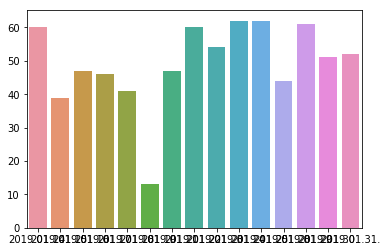

In [109]:
late_per_day_count
g=sns.barplot(list(late_per_day_count.keys()),list(late_per_day_count.values()))